In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

download data ( https://www.kaggle.com/datasets/parulpandey/us-international-air-traffic-data)

<a id='3'></a>
# EDA

In [111]:
df = pd.read_csv('International_Report_Departures.csv')
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [112]:
df.shape

(930808, 16)

In [113]:
df.tail()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461
930807,05/01/1996,1996,5,12478,JFK,22,14210,POS,280,19542,BW,0,Departures,2019,0,2019


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


In [115]:
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [116]:
df['Year'] = pd.DatetimeIndex(df['data_dte']).year # year column for extract some insights
df.head() 

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [117]:
df.groupby('Year').mean()

,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
Year,,,,,,,,,,
1990,6.490466,12761.234343,38.345030,13346.081696,469.632369,19831.879295,0.519117,30.590117,2.485045,33.075162
1991,6.587486,12789.531454,38.855828,13284.268197,460.350913,19837.214441,0.514698,31.417405,2.571795,33.989200
1992,6.542650,12803.515778,39.445594,13289.847388,451.747149,19841.393485,0.530584,31.723813,2.969327,34.693141
1993,6.462978,12814.197920,39.926979,13281.353255,442.851997,19862.137985,0.551345,32.109084,2.861546,34.970630
1994,6.443082,12802.069635,39.844240,13284.186624,441.083649,19882.178758,0.567299,30.970413,2.759273,33.729687
1995,6.454022,12770.314314,39.960906,13366.986994,455.823983,19898.697166,0.575079,32.147031,2.688394,34.835425
1996,6.397215,12788.240277,40.458293,13369.767686,456.180865,19909.559115,0.573598,32.389658,2.540299,34.929958
1997,6.448439,12819.766893,41.278972,13339.102834,444.431312,19920.815389,0.570275,32.913536,2.556393,35.469929
1998,6.386789,12818.997151,41.589165,13363.649732,439.972270,19928.591389,0.573494,35.356279,2.272396,37.628675


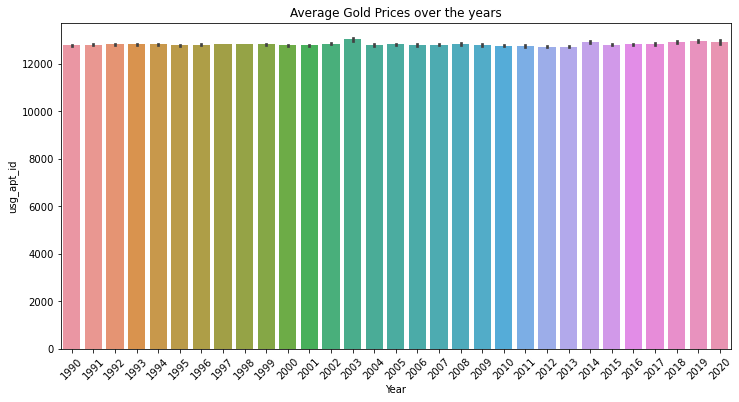

In [118]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='usg_apt_id', data=df)
plt.title('Average Gold Prices over the years')
plt.xticks(rotation=45)
plt.show()

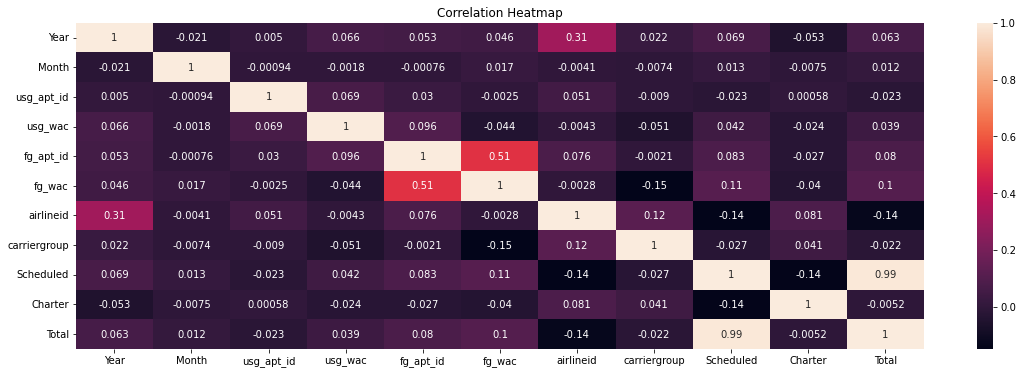

In [119]:
plt.figure(figsize=(19, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [124]:
df['Year'] = pd.DatetimeIndex(df['data_dte']).year
df2 = df.copy()
df2.drop('Year', axis=1, inplace=True)

In [125]:
X = df2.drop(['fg_apt_id', 'usg_wac'], axis=1)
y = df2.fg_apt_id

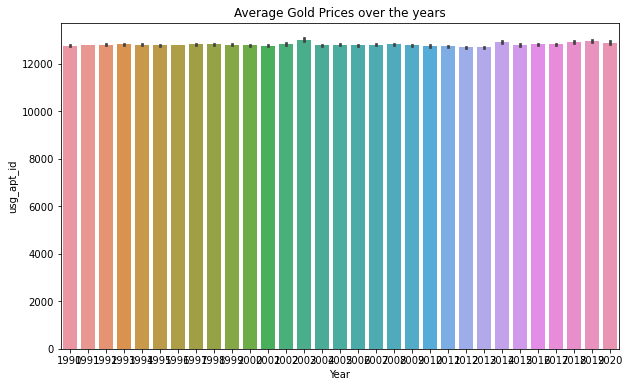

In [126]:
plt.figure(figsize=(10,6))
plt.title('Average Gold Prices over the years')
sns.barplot(x='Year', y='usg_apt_id', data=df);

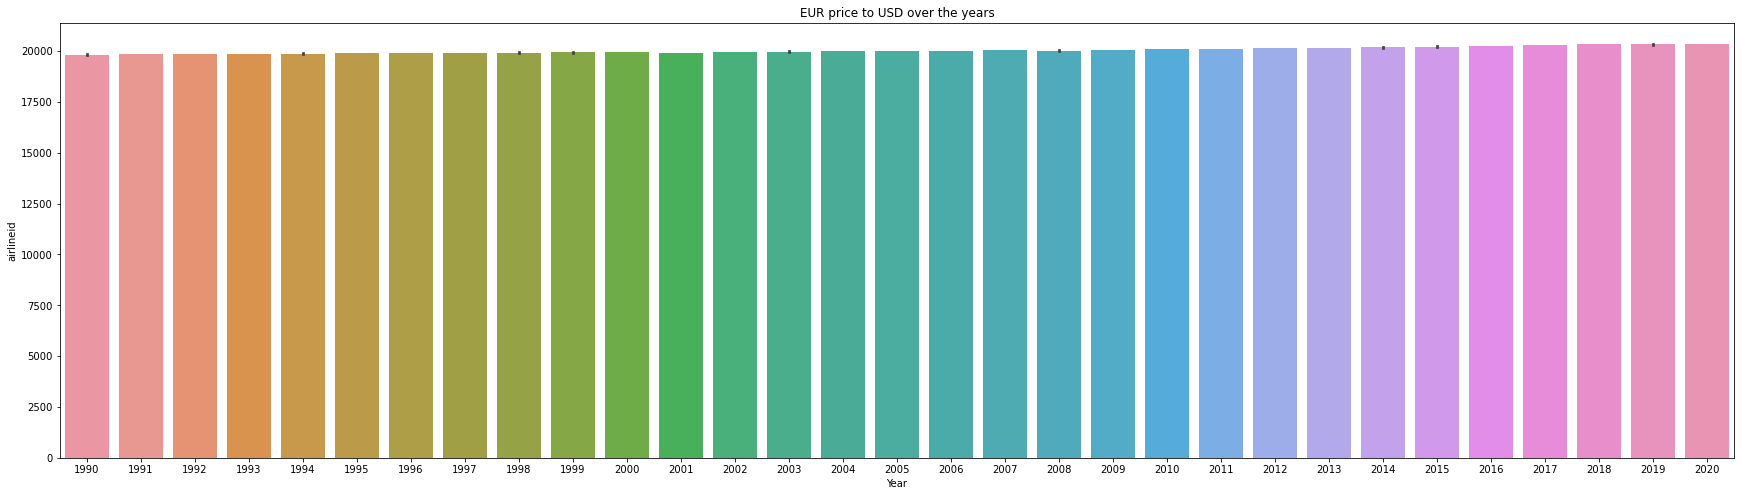

In [127]:
plt.figure(figsize=(30,8))
plt.title('EUR price to USD over the years')
sns.barplot(x='Year', y='airlineid', data=df);

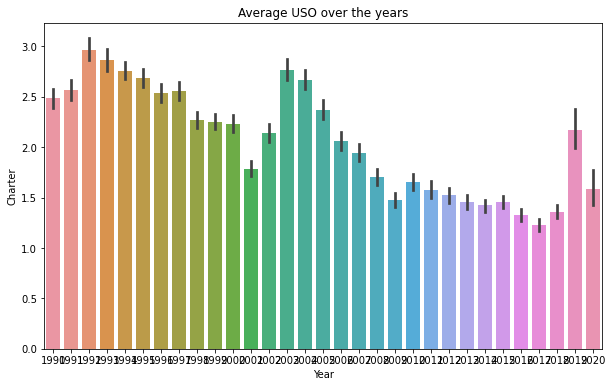

In [128]:
plt.figure(figsize=(10,6))
plt.title('Average USO over the years')
sns.barplot(x='Year', y='Charter', data=df);

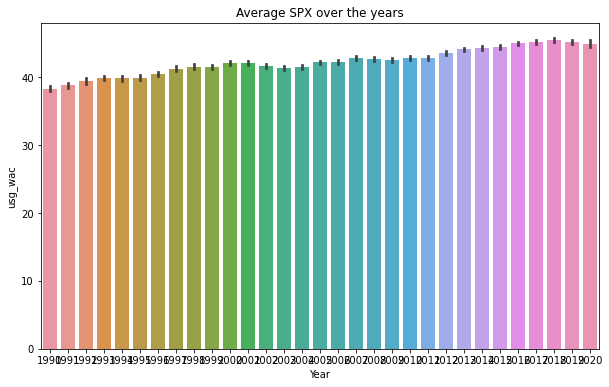

In [129]:
plt.figure(figsize=(10,6))
plt.title('Average SPX over the years')
sns.barplot(x='Year', y='usg_wac', data=df);

In [130]:
df2 = df.copy()
df2.drop('Year', axis=1, inplace=True) # don't need the year column 
df2.head()

,data_dte,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


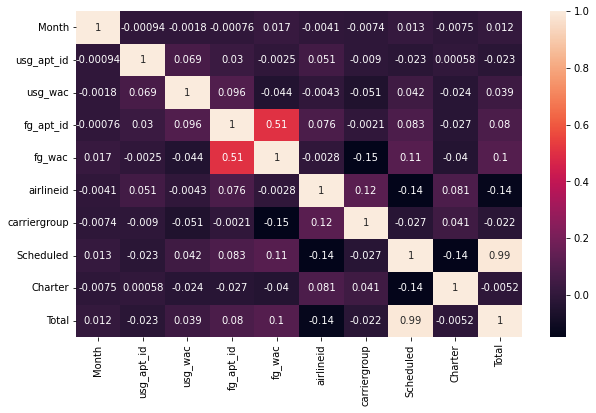

In [131]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True);

Skewness: 0.5234719725143253
Kurtosis: -0.8541621024292922


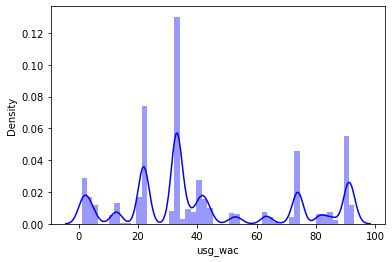

In [132]:
sns.distplot(df['usg_wac'], color = 'blue')
print(f"Skewness: {df['usg_wac'].skew()}")
print(f"Kurtosis: {df['usg_wac'].kurt()}");

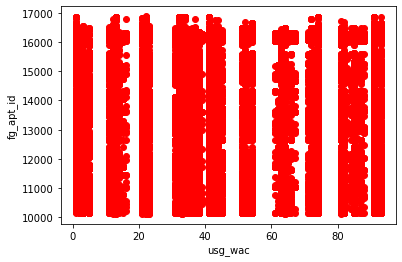

In [133]:
plt.scatter(df.usg_wac, df.fg_apt_id, c='red') #highly correlated
plt.xlabel('usg_wac')
plt.ylabel('fg_apt_id')
plt.show()

In [134]:
X = df2.drop(['fg_apt_id', 'usg_wac'], axis=1)
y = df2.fg_apt_id
X.head()


,data_dte,Month,usg_apt_id,usg_apt,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,5,12016,GUM,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,5,10299,ANC,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,3,10721,BOS,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,12,11259,DAL,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,5,13303,MIA,CMW,219,21323,5L,0,Departures,0,20,20


# Data Visualization

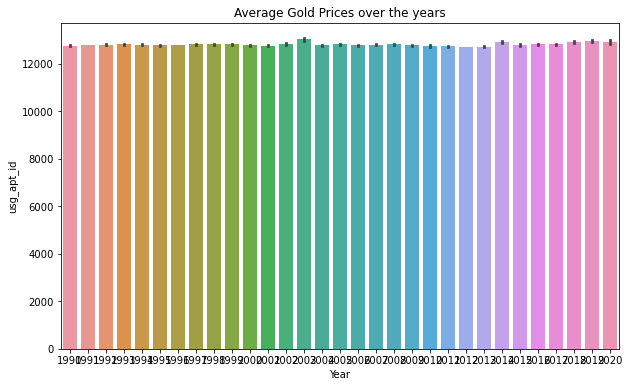

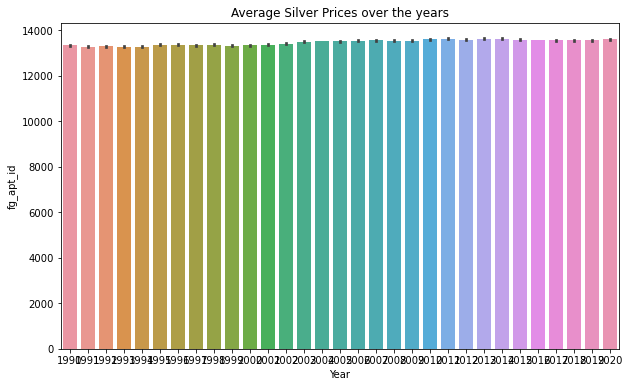

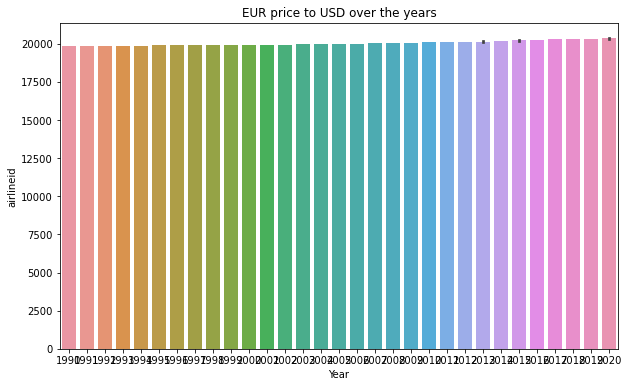

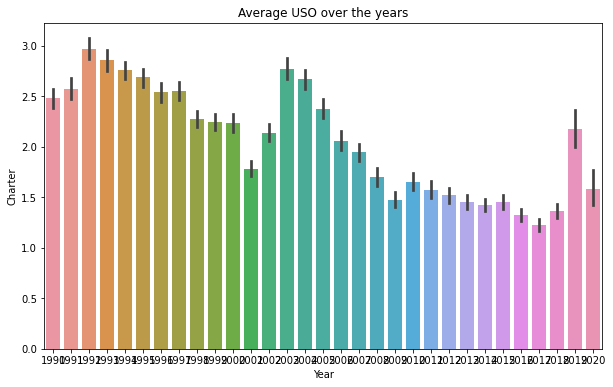

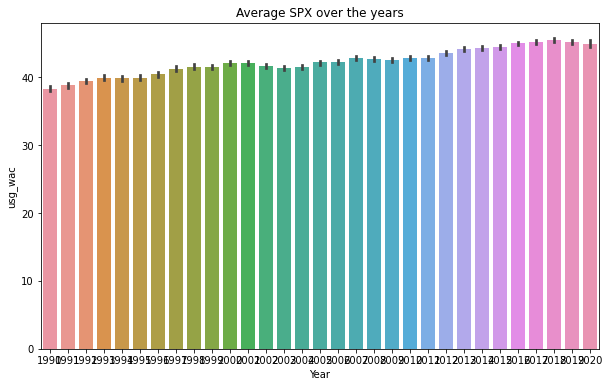

In [137]:
plt.figure(figsize=(10, 6))
plt.title('Average Gold Prices over the years')
sns.barplot(x='Year', y='usg_apt_id', data=df);

plt.figure(figsize=(10, 6))
plt.title('Average Silver Prices over the years')
sns.barplot(x='Year', y='fg_apt_id', data=df);

plt.figure(figsize=(10, 6))
plt.title('EUR price to USD over the years')
sns.barplot(x='Year', y='airlineid', data=df);

plt.figure(figsize=(10, 6))
plt.title('Average USO over the years')
sns.barplot(x='Year', y='Charter', data=df);

plt.figure(figsize=(10, 6))
plt.title('Average SPX over the years')
sns.barplot(x='Year', y='usg_wac', data=df);

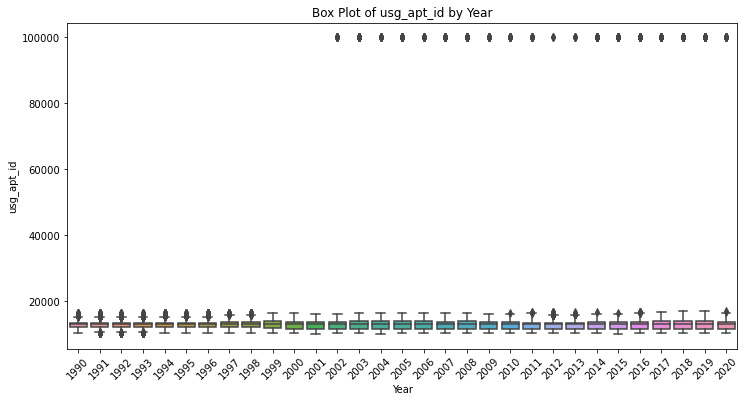

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='usg_apt_id', data=df)
plt.title('Box Plot of usg_apt_id by Year')
plt.xticks(rotation=45)
plt.show()